In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_52766_R')

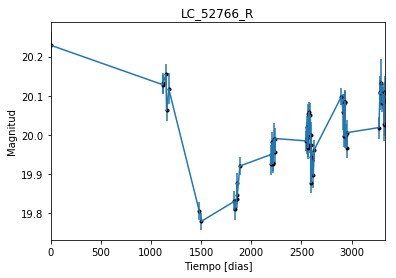

In [2]:
data = np.genfromtxt('LC_52766_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_52766_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

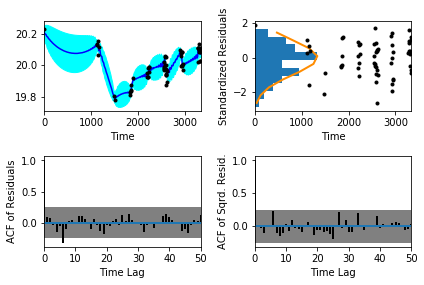

In [5]:
sample.assess_fit()

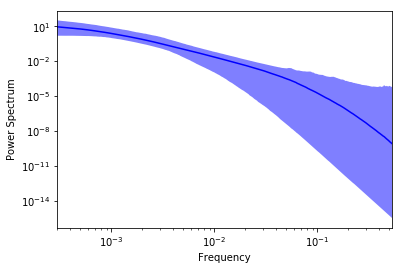

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_52766_R')

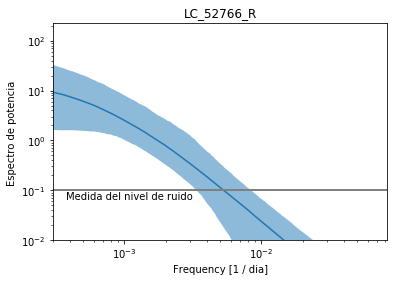

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_52766_R')

Text(0.5,1,'Prediccion , valor esperado LC_52766_R')

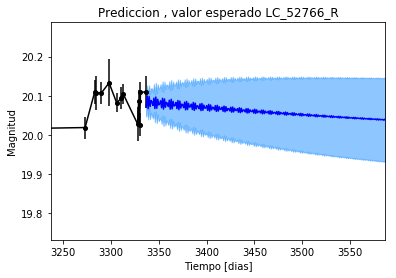

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_52766_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_52766_R')

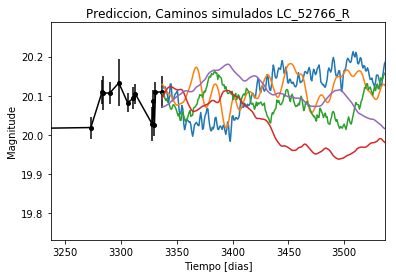

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_52766_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_52766_R')

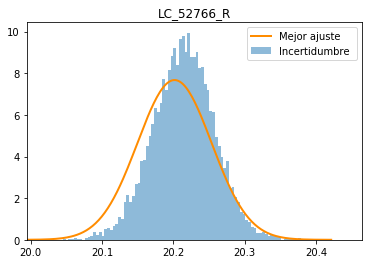

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_52766_R')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_R')

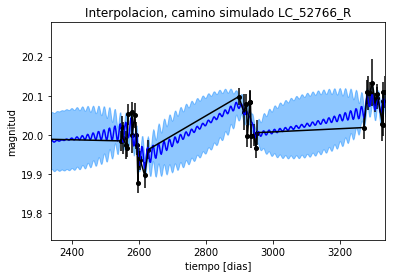

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_R')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_R')

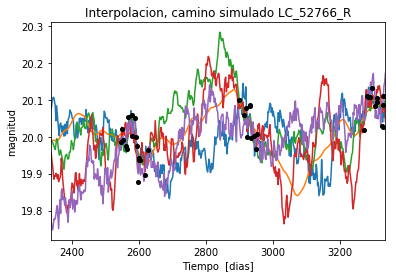

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1015.94295983
Median: 0.025308819964
Standard deviation: 0.211675810851
68% credibility interval: [ 0.00217041  0.24571733]
95% credibility interval: [  4.43500385e-04   8.29296775e-01]
99% credibility interval: [  3.24082150e-04   1.02476709e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 560.485015276
Median: 0.00834400922917
Standard deviation: 0.0982320381258
68% credibility interval: [ 0.00066612  0.06982575]
95% credibility interval: [  3.24270466e-04   3.48780634e-01]
99% credibility interval: [  3.05485190e-04   6.62085569e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 359.201708428
Median: 0.08564837601
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 916.776589351
Median: 125.136068793
Standard deviation: 1.86231483525
68% credibility interval: [ 123.00379979  126.53758847]
95% credibility interval: [ 120.37028252  127.42611662]
99% credibility interval: [ 118.39224197  127.78990893]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 403.007479052
Median: 1.44476485755
Standard deviation: 2.55343410489
68% credibility interval: [ 0.16288685  5.15421232]
95% credibility interval: [ 0.03612159  8.65190913]
99% credibility interval: [  0.01598773  11.47788045]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 526.001019589
Median: 2.37536923601
Standard deviation: 11.6070311145
68% credibility interval: [  0.17361547  16.79852357]
95% credibility interval: [  1.04637892e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5938.89407586
Median: 2.98056518316e-44
Standard deviation: 1478.29767435
68% credibility interval: [  2.62703890e-100   2.61587366e-008]
95% credibility interval: [  9.92569930e-175   6.58275423e-001]
99% credibility interval: [  7.46214663e-189   1.33466028e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2372.54933378
Median: 20.0311851831
Standard deviation: 0.0693973629109
68% credibility interval: [ 19.97092148  20.09870537]
95% credibility interval: [ 19.90198154  20.17504613]
99% credibility interval: [ 19.84569681  20.24822462]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 470.195892006
Median: 0.0910318152403
Standard deviation: 0.289840079449
68% credibility interval: [ 0.          0.55217621]
95% credibility interval: [ 0.          0.96550975]
99% credibility interval: [ 0.          1.04472662]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 470.195892006
Median: 0.0910318152403
Standard deviation: 0.289840079449
68% credibility interval: [ 0.          0.55217621]
95% credibility interval: [ 0.          0.96550975]
99% credibility interval: [ 0.          1.04472662]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 637.263946702
Median: 0.0
Standard deviation: 0.000496442169077
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 916.776589351
Median: 125.136068793
Standard deviation: 1.86231483525
68% credibility interval: [ 123.00379979  126.53758847]
95% credibility interval: [ 120.37028252  127.42611662]
99% credibility interval: [ 118.39224197  127.78990893]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2812.92749821
Median: 0.0201992147893
Standard deviation: 0.0168931833309
68% credibility interval: [ 0.01285417  0.03299214]
95% credibility interval: [ 0.00875152  0.05822921]
99% credibility interval: [ 0.00693066  0.10140135]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1269.30861515
Median: 1.1319692001
Standard deviation: 0.207439079425
68% credibility interval: [ 0.94903086  1.35952911]
95% credibility interval: [ 0.79539464  1.60369404]
99% credibility interval: [ 0.72140131  1.79723262]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 337.820293861
Median: 0.00405439063164
Standard deviation: 0.275583139944
68% credibility interval: [  1.05075023e-04   1.07078349e-01]
95% credibility interval: [  2.44025369e-06   8.49211071e-01]
99% credibility interval: [  2.95847353e-07   2.07682613e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1015.94295983
Median: (-0.15902000574-1.30227259911j)
Standard deviation: 2.2550764397
68% credibility interval: [-1.54388751+0.j         -0.01363711-0.21637447j]
95% credibility interval: [ -5.21062531e+00+0.j          -2.78659510e-03-0.36085406j]
99% credibility interval: [ -6.43880152e+00+0.j          -2.03626820e-03-3.92895203j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 560.485015276
Median: (-0.0524269561917+6.07427438251j)
Standard deviation: 1.92286828932
68% credibility interval: [-0.43872810+2.20347816j -0.00418533+0.j        ]
95% credibility interval: [ -2.19145336e+00+6.05030675j  -2.03745143e-03+0.31958451j]
99% credibility interval: [ -4.16000632e+00+3.87211964j  -1.91942006e-03+0.00913543j]
Posteri